In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


antofagasta cl
pangody ru
hilo us
hilo us
vikulovo ru
kudahuvadhoo mv
cabo san lucas mx
busselton au
kodiak us
albany au
victoria sc
taolanaro mg
lebu cl
rikitea pf
olinda br
jamestown sh
noumea nc
yellowknife ca
saint-paul re
puerto ayora ec
busselton au
taolanaro mg
kozhva ru
komsomolskiy ru
twentynine palms us
yellowknife ca
yellowknife ca
ribeira grande pt
vaini to
mar del plata ar
albany au
busselton au
saldanha za
rocha uy
illoqqortoormiut gl
lakes entrance au
puerto ayora ec
mahebourg mu
busselton au
new norfolk au
tahta eg
mataura pf
egvekinot ru
baykit ru
georgetown sh
guano ec
termoli it
bilibino ru
mataura pf
tidore id
bilma ne
fremont us
lebu cl
georgetown sh
cabo san lucas mx
amderma ru
cidreira br
punta arenas cl
tiksi ru
mucuri br
prince george ca
albany au
rikitea pf
yellowknife ca
punta arenas cl
narathiwat th
mar del plata ar
batemans bay au
yambio sd
ko samui th
mataura pf
port elizabeth za
saint george bm
busselton au
erzin ru
amderma ru
tessalit ml
rikitea pf
puert

nikolskoye ru
torbay ca
avarua ck
qaanaaq gl
loviisa fi
hobart au
tuatapere nz
albany au
surgut ru
panguna pg
porto velho br
rikitea pf
ushuaia ar
cervo es
kavaratti in
kodiak us
cabo san lucas mx
upernavik gl
rikitea pf
hithadhoo mv
banjar id
taolanaro mg
mataura pf
araouane ml
laguna br
busselton au
rikitea pf
constitucion mx
rawson ar
cape town za
cape town za
atuona pf
ushuaia ar
angra dos reis br
isangel vu
hobart au
vila velha br
ponta do sol cv
bethel us
nam som th
iracoubo gf
muros es
butaritari ki
katsuura jp
rosetta eg
bluff nz
wadi musa jo
thompson ca
san mateo del mar mx
mar del plata ar
waingapu id
duku ng
manoel urbano br
veinticinco de mayo ar
albany au
darlawn in
buluang ph
vaini to
port moresby pg
arraial do cabo br
manta ec
barrow us
maunabo us
san vicente ar
itarema br
rikitea pf
rikitea pf
dingle ie
atuona pf
jamestown sh
aranos na
sentyabrskiy ru
corbelia br
tumannyy ru
bucerias mx
punta arenas cl
new norfolk au
jamestown sh
chalala in
camacha pt
rikitea pf
roebour

arraial do cabo br
sitka us
tasiilaq gl
turtas ru
sept-iles ca
mount gambier au
tezu in
ipixuna br
ushuaia ar
cabedelo br
port alfred za
port hardy ca
upernavik gl
axim gh
bluff nz
progreso mx
rafai cf
rikitea pf
nakamura jp
coquimbo cl
busselton au
yellowknife ca
port alfred za
dikson ru
aasiaat gl
punta arenas cl
kieta pg
saskylakh ru
rikitea pf
mar del plata ar
kormilovka ru
burica pa
bilibino ru
souillac mu
arawa pg
ushuaia ar
provideniya ru
hilo us
georgetown sh
richards bay za
bathsheba bb
simbahan ph
ribeira grande pt
tsihombe mg
kruisfontein za
tasiilaq gl
narsaq gl
longyearbyen sj
manokwari id
pilar ph
punta arenas cl
alvik no


In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | antofagasta
Processing Record 2 of Set 1 | pangody
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | vikulovo
Processing Record 5 of Set 1 | kudahuvadhoo
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | olinda
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | noumea
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | saint-paul
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | kozhva
Processing Record 21 of Set 1 | komsomolskiy
Processing Record 22 of Set 1 | twentynine palms
Pr

Processing Record 36 of Set 4 | havre
Processing Record 37 of Set 4 | laguna
Processing Record 38 of Set 4 | maketu
Processing Record 39 of Set 4 | praia
Processing Record 40 of Set 4 | kailua
Processing Record 41 of Set 4 | calvinia
Processing Record 42 of Set 4 | vetapalem
Processing Record 43 of Set 4 | limot
Processing Record 44 of Set 4 | kaitangata
Processing Record 45 of Set 4 | pueblo nuevo
Processing Record 46 of Set 4 | poltava
Processing Record 47 of Set 4 | saint-augustin
Processing Record 48 of Set 4 | alyangula
Processing Record 49 of Set 4 | san cristobal
Processing Record 50 of Set 4 | steamboat springs
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | vytegra
Processing Record 3 of Set 5 | sadovoye
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | kavant
City not found. Skipping...
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 5 | udomlya
Proces

Processing Record 24 of Set 8 | malibu
Processing Record 25 of Set 8 | thompson
Processing Record 26 of Set 8 | muros
Processing Record 27 of Set 8 | khormuj
City not found. Skipping...
Processing Record 28 of Set 8 | torbay
Processing Record 29 of Set 8 | loviisa
Processing Record 30 of Set 8 | tuatapere
Processing Record 31 of Set 8 | surgut
Processing Record 32 of Set 8 | panguna
Processing Record 33 of Set 8 | porto velho
Processing Record 34 of Set 8 | cervo
Processing Record 35 of Set 8 | kavaratti
Processing Record 36 of Set 8 | banjar
Processing Record 37 of Set 8 | araouane
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | angra dos reis
Processing Record 40 of Set 8 | isangel
Processing Record 41 of Set 8 | vila velha
Processing Record 42 of Set 8 | nam som
Processing Record 43 of Set 8 | iracoubo
Processing Record 44 of Set 8 | rosetta
Processing Record 45 of Set 8 | wadi musa
Processing Record 46 of Set 8 | san mateo del mar
Processing Record 47 of Set 

Processing Record 14 of Set 12 | faya
Processing Record 15 of Set 12 | guildford
Processing Record 16 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 17 of Set 12 | chapais
Processing Record 18 of Set 12 | sangar
Processing Record 19 of Set 12 | lakheri
Processing Record 20 of Set 12 | loikaw
Processing Record 21 of Set 12 | wad rawah
Processing Record 22 of Set 12 | kushikino
Processing Record 23 of Set 12 | muisne
Processing Record 24 of Set 12 | birin
Processing Record 25 of Set 12 | cayenne
Processing Record 26 of Set 12 | kuche
City not found. Skipping...
Processing Record 27 of Set 12 | zeya
Processing Record 28 of Set 12 | portland
Processing Record 29 of Set 12 | mesetas
Processing Record 30 of Set 12 | champerico
Processing Record 31 of Set 12 | port hedland
Processing Record 32 of Set 12 | loandjili
Processing Record 33 of Set 12 | marzuq
Processing Record 34 of Set 12 | eureka
Processing Record 35 of Set 12 | masvingo
Processing Record 36 of Set 12 | sorva

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Antofagasta,-23.6500,-70.4000,60.80,88,75,6.91,CL,2021-04-18 08:00:03
1,Pangody,65.8500,74.4859,7.41,87,100,16.13,RU,2021-04-18 08:00:50
2,Hilo,19.7297,-155.0900,75.20,64,90,6.91,US,2021-04-18 07:58:34
3,Vikulovo,56.8167,70.6107,36.57,69,100,24.74,RU,2021-04-18 08:00:50
4,Kudahuvadhoo,2.6708,72.8944,83.79,62,93,8.63,MV,2021-04-18 08:00:51
5,Cabo San Lucas,22.8909,-109.9124,66.00,63,1,11.52,MX,2021-04-18 08:00:51
6,Busselton,-33.6500,115.3333,75.99,45,0,3.00,AU,2021-04-18 08:00:52
7,Kodiak,57.7900,-152.4072,39.20,93,90,6.91,US,2021-04-18 08:00:52
8,Albany,42.6001,-73.9662,42.01,71,97,3.00,US,2021-04-18 07:56:56
9,Victoria,22.2855,114.1577,75.00,69,28,3.00,HK,2021-04-18 07:59:36


In [20]:
# Create new dataframe for refactored data
city_refactored_df = pd.DataFrame(city_data)
# Reorder the columns to make the data table easier to read 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_refactored_df = city_refactored_df[new_column_order]
city_refactored_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Antofagasta,CL,2021-04-18 08:00:03,-23.6500,-70.4000,60.80,88,75,6.91
1,Pangody,RU,2021-04-18 08:00:50,65.8500,74.4859,7.41,87,100,16.13
2,Hilo,US,2021-04-18 07:58:34,19.7297,-155.0900,75.20,64,90,6.91
3,Vikulovo,RU,2021-04-18 08:00:50,56.8167,70.6107,36.57,69,100,24.74
4,Kudahuvadhoo,MV,2021-04-18 08:00:51,2.6708,72.8944,83.79,62,93,8.63
5,Cabo San Lucas,MX,2021-04-18 08:00:51,22.8909,-109.9124,66.00,63,1,11.52
6,Busselton,AU,2021-04-18 08:00:52,-33.6500,115.3333,75.99,45,0,3.00
7,Kodiak,US,2021-04-18 08:00:52,57.7900,-152.4072,39.20,93,90,6.91
8,Albany,US,2021-04-18 07:56:56,42.6001,-73.9662,42.01,71,97,3.00
9,Victoria,HK,2021-04-18 07:59:36,22.2855,114.1577,75.00,69,28,3.00


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

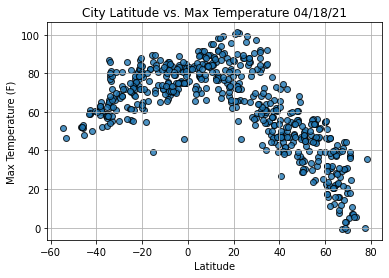

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

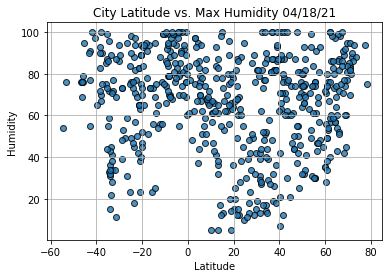

In [25]:
# Build the scatter plot for latitude vs. humidity 
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

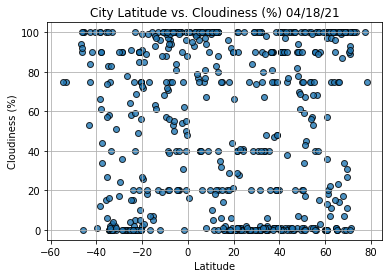

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

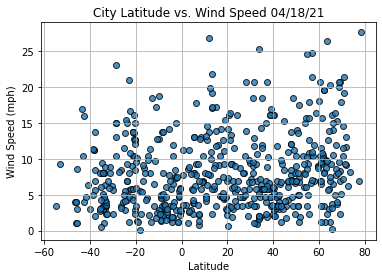

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()